In [1]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

In [2]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [3]:
def equalize_this_library(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq

------------------------------------------------

In [4]:
def enhance_contrast(image_matrix, bins=256):
    image_flattened = image_matrix.flatten()
    image_hist = np.zeros(bins)

    # frequency count of each pixel
    for pix in image_matrix:
        image_hist[pix] += 1

    # cummulative sum
    cum_sum = np.cumsum(image_hist)
    norm = (cum_sum - cum_sum.min()) * 255
    # normalization of the pixel values
    n_ = cum_sum.max() - cum_sum.min()
    uniform_norm = norm / n_
    uniform_norm = uniform_norm.astype('int')

    # flat histogram
    image_eq = uniform_norm[image_flattened]
    # reshaping the flattened matrix to its original shape
    image_eq = np.reshape(a=image_eq, newshape=image_matrix.shape)

    return image_eq

In [5]:
def equalize_this_scratch(image_file, with_plot=False, gray_scale=False, bins=256):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image = image_src[:, :, 0]
        g_image = image_src[:, :, 1]
        b_image = image_src[:, :, 2]

        r_image_eq = enhance_contrast(image_matrix=r_image)
        g_image_eq = enhance_contrast(image_matrix=g_image)
        b_image_eq = enhance_contrast(image_matrix=b_image)

        image_eq = np.dstack(tup=(r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = enhance_contrast(image_matrix=image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq

# From scratch

In [21]:
path = '/home/khamituly/Documents/defense/common_patients/x/2_1.jpg'
path2 = '/home/khamituly/Documents/defense/common_patients/x/20_4.jpg'

In [22]:
image = cv2.imread(path2)

In [23]:
contrast = equalize_this_scratch(image_file=path2, with_plot=False)

In [24]:
np.info(image)

class:  ndarray
shape:  (494, 508, 3)
strides:  (1524, 3, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x4cb5e90
byteorder:  little
byteswap:  False
type: uint8


In [25]:
contrast = contrast.astype('uint8')

In [26]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
# axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# axs[1].set_title('Contrast enhanced')
axs[1].imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB))
axs[1].set_title('Denoised version')

plt.show()

# Library

True

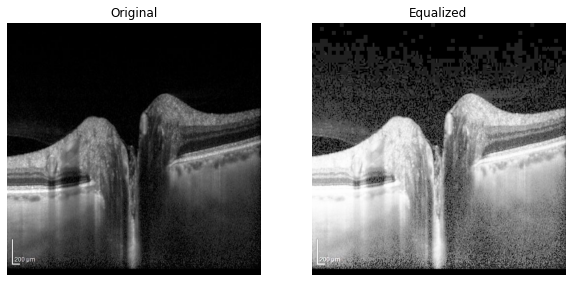

In [32]:
equalize_this_library(image_file='/home/khamituly/Documents/Diploma work/big_datasets/patients/1/1.jpg', with_plot=True)